In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, pacf, acf
from statsmodels.tsa.arima_model import ARIMA

In [10]:
UE = pd.read_csv('UNRATE.csv')
UE.head(10)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


## Plotting Time Series

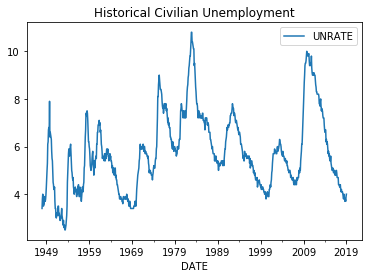

In [12]:
UE.index = pd.to_datetime(UE.DATE)
UE.plot()
plt.title('Historical Civilian Unemployment')
plt.show()

Based on the plot, it is clear that although unemployment has been cyclical, recent (past five years) indicate a decrease in civilian unemployment; the cyclical pattern could suggest seasonal trends. 

## Using Differencing Create Stationary Set

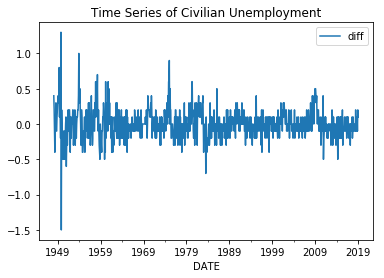

In [16]:
UE['diff'] = UE.UNRATE - UE.UNRATE.shift(periods=1)
UE.plot(y='diff')
plt.title('Time Series of Civilian Unemployment')
plt.show()

In [17]:
x = UE['UNRATE']
result = adfuller(x)
print('Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])

x_diff = UE['diff'].iloc[1:]
result = adfuller(x_diff)
print('\nDifferenced Data:')
print('ADF Statistic %f' % result[0])
print('p-value: %f' % result[1])

Data:
ADF Statistic -3.071657
p-value: 0.028723

Differenced Data:
ADF Statistic -8.661216
p-value: 0.000000


Using the D-Fuller test, we see that the time series data set we had was stationary for both raw and differenced data as both p-values are under 0.05. 

## Generate ACF, PACF

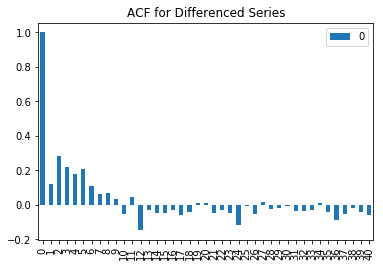

In [19]:
x_acf = pd.DataFrame(acf(x_diff))
x_acf.plot(kind='bar')
plt.title('ACF for Differenced Series')
plt.show()

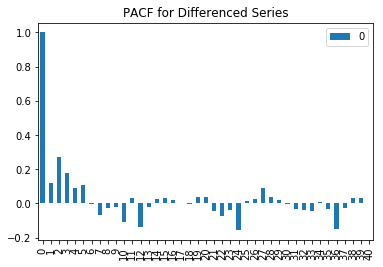

In [20]:
pacf = pd.DataFrame(pacf(x_diff))
pacf.plot(kind='bar')
plt.title('PACF for Differenced Series')
plt.show()

Let's take a look at ACF and PACF; ACF determines the MA parameter, and PACF determines the AR parameter. Both PACF and ACF show no clear spikes in the lags - except for maybe 2, which is something we will consider when doing our ARIMA modeling. 

## ARIMA Modeling - 010, 111 and 212; Residuals

### ARIMA_010

In [31]:
#for ARIMA, we're going to try out 010, 111, and 212.
ARIMA_010 = ARIMA(UE['UNRATE'], order=(0,1,0))
ARIMA_010_fit = ARIMA_010.fit()
print(ARIMA_010_fit.summary())
print('Residuals Description')
print(ARIMA_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  852
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 125.681
Method:                           css   S.D. of innovations              0.209
Date:                Tue, 05 Mar 2019   AIC                           -247.362
Time:                        15:21:49   BIC                           -237.867
Sample:                    02-01-1948   HQIC                          -243.726
                         - 01-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.007      0.098      0.922      -0.013       0.015
Residuals Description
count    8.520000e+02
mean     2.001831e-09
std      2.089073e-01
min     -1.500704e+00
25%     -1.007042e-01

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]`

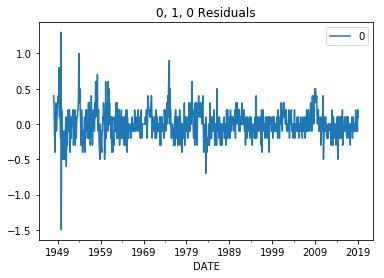

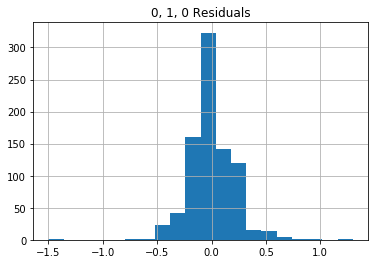

In [25]:
resid_010 = pd.DataFrame(ARIMA_010_fit.resid)
resid_010.plot(legend=True)
plt.title('0, 1, 0 Residuals')

resid_010.hist(bins=20)
plt.title('0, 1, 0 Residuals')

plt.show()

### ARIMA_111

In [26]:
ARIMA_111 = ARIMA(UE['UNRATE'], order=(1,1,1))
ARIMA_111_fit = ARIMA_111.fit()
print(ARIMA_111_fit.summary())
print('Residuals Description')
print(ARIMA_111_fit.resid.describe())

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  852
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 165.812
Method:                       css-mle   S.D. of innovations              0.199
Date:                Tue, 05 Mar 2019   AIC                           -323.623
Time:                        15:17:31   BIC                           -304.633
Sample:                    02-01-1948   HQIC                          -316.350
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0015      0.015      0.103      0.918      -0.028       0.031
ar.L1.D.UNRATE     0.8708      0.029     29.528      0.000       0.813       0.929
ma.L1.D.UNRATE    -0.7164      0.038

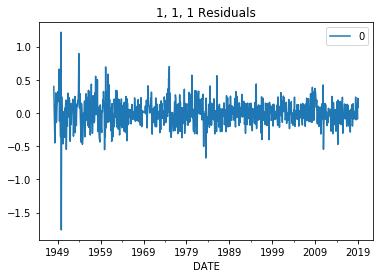

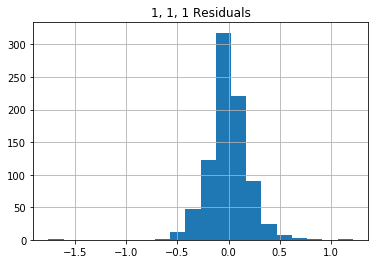

In [29]:
resid_111 = pd.DataFrame(ARIMA_111_fit.resid)
resid_111.plot(legend=True)
plt.title('1, 1, 1 Residuals')

resid_111.hist(bins=20)
plt.title('1, 1, 1 Residuals')

plt.show()

### ARIMA_212

In [32]:
ARIMA_212 = ARIMA(UE['UNRATE'], order=(2,1,2))
ARIMA_212_fit = ARIMA_212.fit()
print(ARIMA_212_fit.summary())
print('Residuals Description')
print(ARIMA_212_fit.resid.describe())

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  852
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 189.837
Method:                       css-mle   S.D. of innovations              0.194
Date:                Tue, 05 Mar 2019   AIC                           -367.675
Time:                        15:22:21   BIC                           -339.189
Sample:                    02-01-1948   HQIC                          -356.765
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0016      0.012      0.140      0.889      -0.021       0.025
ar.L1.D.UNRATE     1.6540      0.040     41.849      0.000       1.577       1.732
ar.L2.D.UNRATE    -0.7779      0.044

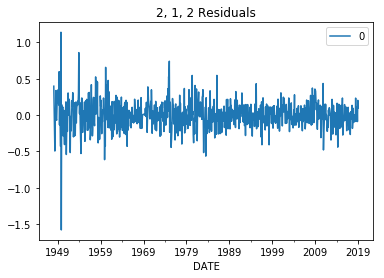

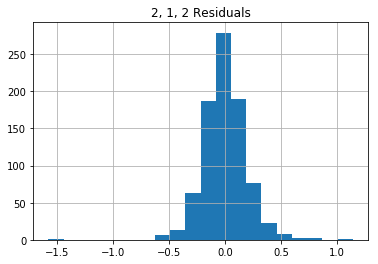

In [33]:
resid_212 = pd.DataFrame(ARIMA_212_fit.resid)
resid_212.plot(legend=True)
plt.title('2, 1, 2 Residuals')

resid_212.hist(bins=20)
plt.title('2, 1, 2 Residuals')

plt.show()

All residuals appear to be normally distributed. The AIC values for all three were negative (is this normal?); at -367, our ARIMA_212 model had the lowest AIC score. To determine which model works the best, we will proceed to our last step. 

## Choosing best model via information loss 

In [37]:
AIC_010 = -247.362
AIC_111 = -323.623
AIC_212 = -367.675

loss_111 = np.exp((AIC_212 - AIC_111) / 2)
loss_010 = np.exp((AIC_212 - AIC_010) / 2)

print(loss_111)
print(loss_010)

2.7178766442261624e-10
7.487968338286477e-27


Based on information loss, ARIMA_111 should work the best with this dataset. (Disclaimer: not exactly sure how the negative AIC values have influenced this conclusion, will ask mentor). 